In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from dataset_reader import Traces_Dataset

from exp_generate_data import exp_formalism_data_generator
from exp_hh_model import HH_model_exp
from DE_obj_model import de_obj_model   

In [2]:
dataset = Traces_Dataset('../dataset_test.csv')

In [3]:
target_num = 2
target_prestep_V = int(dataset.prestep_V[target_num])
target_step_V1 = int(dataset.step_Vs[target_num].numpy()[0])
target_dV = dataset.step_Vs[target_num].numpy()[1] - dataset.step_Vs[target_num].numpy()[0]
target_params = dataset.params[target_num].numpy()

target_prestep_V, target_step_V1, target_dV

(-122, -41, 11.0)

In [4]:
target_num = 2

prestep_V_2d = dataset.prestep_V[target_num].numpy().reshape(-1,1)
step_Vs_2d = dataset.step_Vs[target_num].numpy().reshape(-1,1)
t = dataset.time_traces[target_num].numpy()

target_params = dataset.params[target_num].numpy()

# sim setup for obj evaluation model
sim_setup_2d = {'prestep_V': prestep_V_2d, 'step_Vs': step_Vs_2d, 't': t}   

In [5]:
def obj(trail_params, sim_setup_2d = sim_setup_2d, target_params = target_params): 
    '''
    x: a 1-D array of the variables for the obj function (the parameters we are estimating)
    args: a tupleo f additional fixed parameters (prestep_V, step_V0, time_traces)
    *args=(sim_setup_2d, target_params)
    '''
    trail_model = de_obj_model(trail_params, sim_setup_2d)
    trail_traces = trail_model.simulation()
    # print(trail_traces[1])
    target_model = de_obj_model(target_params, sim_setup_2d)
    target_traces = target_model.simulation()
    # print(target_traces[1]) 
    
    return np.sum(np.square(trail_traces - target_traces))

In [8]:
# p inclusive on both ends
params_bounds = {'p': (1, 4), 
                 'g_max': (100, 140), 
                 'E_rev': (-100, -60), 
                 'a_m': (0, 100), 
                 'b_m': (0, 100), 
                 'delta_m': (0, 1), 
                 's_m': (-100, 0)}

# prestep_V bounds -> only take values from lb to up with increment of 10
# step_Vs bounds -> the lower bounds on step_Vs, generate an array of step_Vs using increment of 10 with 11 elements. 
# dV_bd inclusive on both ends
t = np.arange(0.0, 6.0, 0.01)
exp_setupNbounds = {'prestep_V_bounds': (target_prestep_V, target_prestep_V), 'step_Vs_lb': (target_step_V1, target_step_V1), 'dV_bd': (target_dV, target_dV), 'n_traces': 8, 't': t}

# sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(-20, 100, 13), 't': np.arange(0.0, 6.0, 0.01)}

data_generator = exp_formalism_data_generator(params_bounds, exp_setupNbounds)
n_samples = 100
data_generator.generate_data(n_samples)
data_generator.dataset.shape


/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exp_rates_generalized_exp_setup/Identifiability /../exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exp_rates_generalized_exp_setup/Identifiability /../exp_hh_model.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((V - self.V_2m) / self.s_m))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exp_rates_generalized_exp_setup/Identifiability /../exp_hh_model.py:85: RuntimeWarning: invalid value encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exp_rates_generalized_exp_setup/Identifia

(100, 336)

In [28]:
trail_params = data_generator.dataset[:, -7:]
trail_params.shape

(100, 7)

In [7]:
trail_params = dataset.params.numpy()

fitness_list = [obj(trail_params[sample]) for sample in range(trail_params.shape[0])]
param_lists = []
for i in range(trail_params.shape[1]):
    param_list = [trail_params[sample, i] for sample in range(trail_params.shape[0])]
    param_lists.append(param_list)

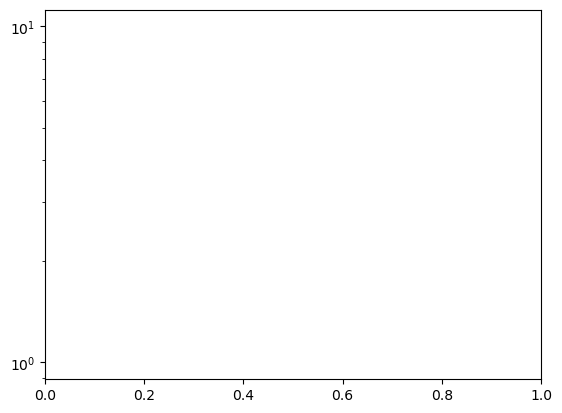

In [8]:
plt.yscale('log')


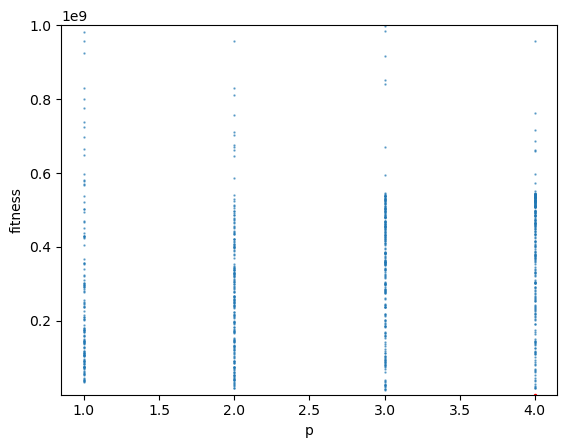

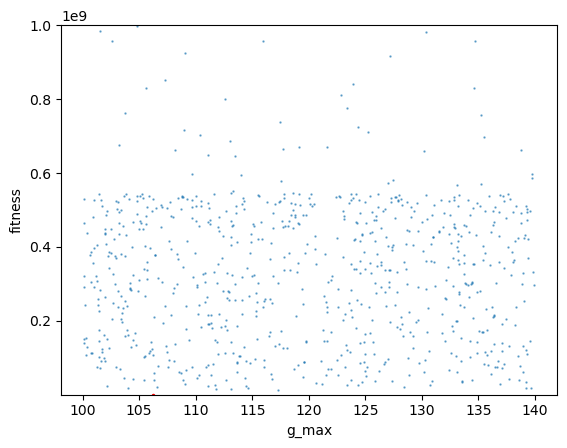

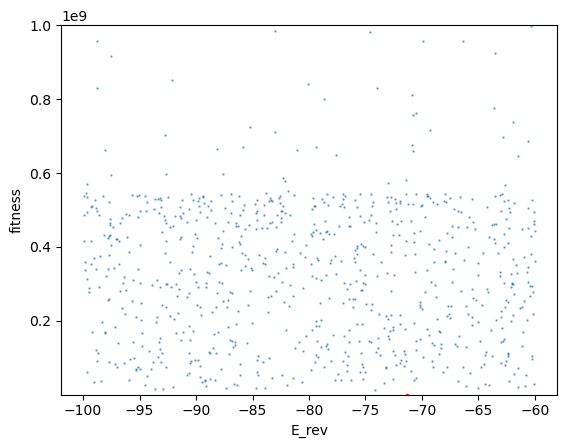

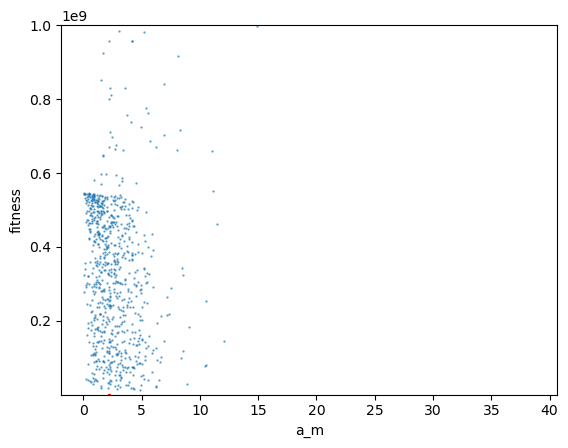

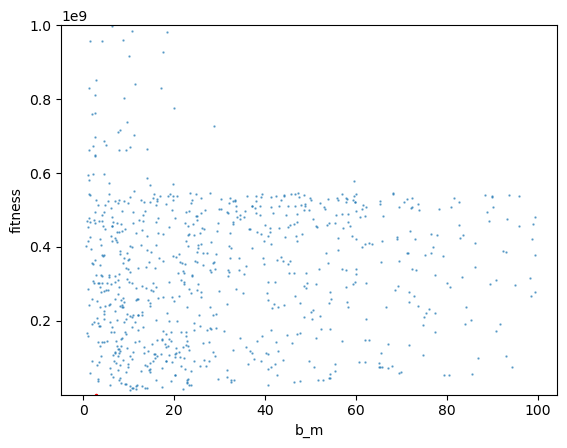

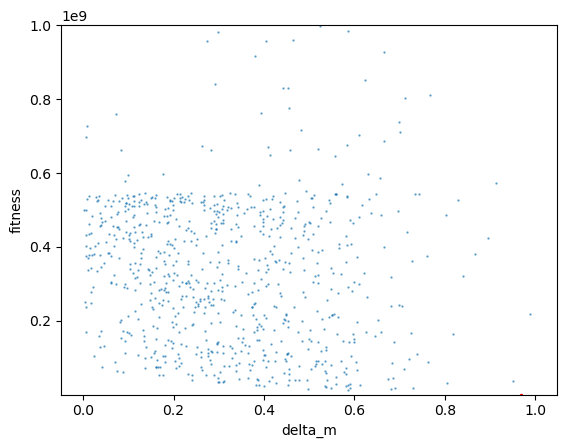

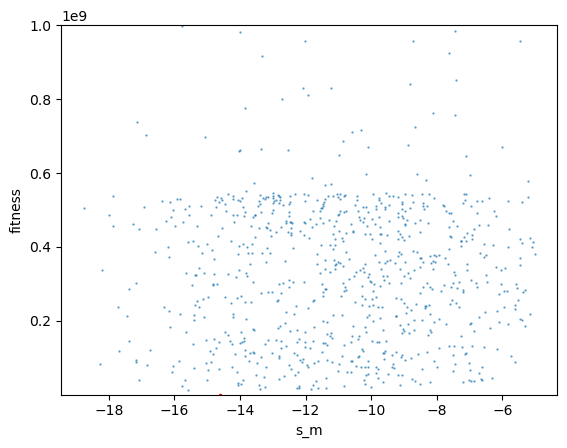

In [14]:
params_bounds = {'p': (1, 4), 
                 'g_max': (100, 140), 
                 'E_rev': (-100, -60), 
                 'a_m': (0, 100), 
                 'b_m': (0, 100), 
                 'delta_m': (0, 1), 
                 's_m': (-100, 0)}

params_names = list(params_bounds.keys())

for i in range(trail_params.shape[1]):
    plt.figure()
    plt.scatter(param_lists[i], fitness_list, alpha=0.6, s=0.5)
    plt.plot(target_params[i], 0, 'ro', markersize=1.5)
    plt.xlabel(params_names[i])
    plt.ylabel('fitness')
    plt.ylim(1e-1, 1e9)
    